# Setup

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import probplot, boxcox
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

## Load the csv

In [2]:
df = pd.read_csv(r'housing.csv')

# Initial Data Investigation

## Dataframe Shape

In [9]:
df.shape

(20640, 10)

## Check the first 5 rows

In [8]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


## Check the last 5 rows

In [10]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


## Check the data types of each column

In [11]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

## Dataframe Statistics

In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Initial Data Investigation Findings
- The dataset contains 10 columns (features) and 20,640 rows (samples)
- The 'ocean_proximity' variable is a categorical variable and not a numerical type like the remaining columns
- There may be more useful features that could be engineered from multiple features

# Data Cleaning

## Check for missing values
The 'total_bedrooms' column contains missing values

In [8]:
df.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

## View all rows where 'total_bedrooms' is null
There is 207 rows of data where total_bedrooms is null

In [9]:
df[df['total_bedrooms'].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


## If we want to drop (but we will impute instead)

In [119]:
#df.dropna()

## Impute with mean
Rather than disposing 207 samples of data, we can impute the missing values using an average value. First, we will test the mean value.

In [12]:
mean_val = df['total_bedrooms'].mean()
print(mean_val)
df['total_bedrooms'].fillna(mean_val, inplace=True)

537.8705525375618


In [13]:
df.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

## Example of data with mean imputted

In [13]:
df.iloc[290]

longitude                -122.16
latitude                   37.77
housing_median_age          47.0
total_rooms               1256.0
total_bedrooms        537.870553
population                 570.0
households                 218.0
median_income              4.375
median_house_value      161900.0
ocean_proximity         NEAR BAY
Name: 290, dtype: object

## Drop duplicate data

In [14]:
df.drop_duplicates()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# Feature Engineering

We can create some new features, such as:
- 'rooms_per_household', by dividing the 'total_rooms' by 'households'
- 'bedrooms_per_room', by dividing 'total_bedrooms' by 'total_rooms'
- 'population_per_household', by dividing 'population' by 'households'

We can assess how well correlated this data is with the 'median_house_value' to see which features we should keep or drop

In [15]:
# Create the new feature
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms']/df['total_rooms']
df['population_per_household'] = df['population']/df['households']

df_no_op = df.drop(['ocean_proximity'], axis=1)
corr_matrix = df_no_op.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049454
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.220049
Name: median_house_value, dtype: float64

In [16]:
# Drop the original features
df = df.drop(['population', 'housing_median_age', 'population_per_household'], axis=1)

df_no_op = df.drop(['ocean_proximity'], axis=1)
corr_matrix = df_no_op.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value     1.000000
median_income          0.688075
rooms_per_household    0.151948
total_rooms            0.134153
households             0.065843
total_bedrooms         0.049454
longitude             -0.045967
latitude              -0.144160
bedrooms_per_room     -0.220049
Name: median_house_value, dtype: float64

### Boxplots

In [126]:
# # Create a boxplot for each column
# for column in df:
#     # Check if the column data type is numeric
#     if pd.api.types.is_numeric_dtype(df[column]):
#         plt.figure()
#         sns.boxplot(x=df[column], color='skyblue')
#         plt.title(column)
#         plt.show()

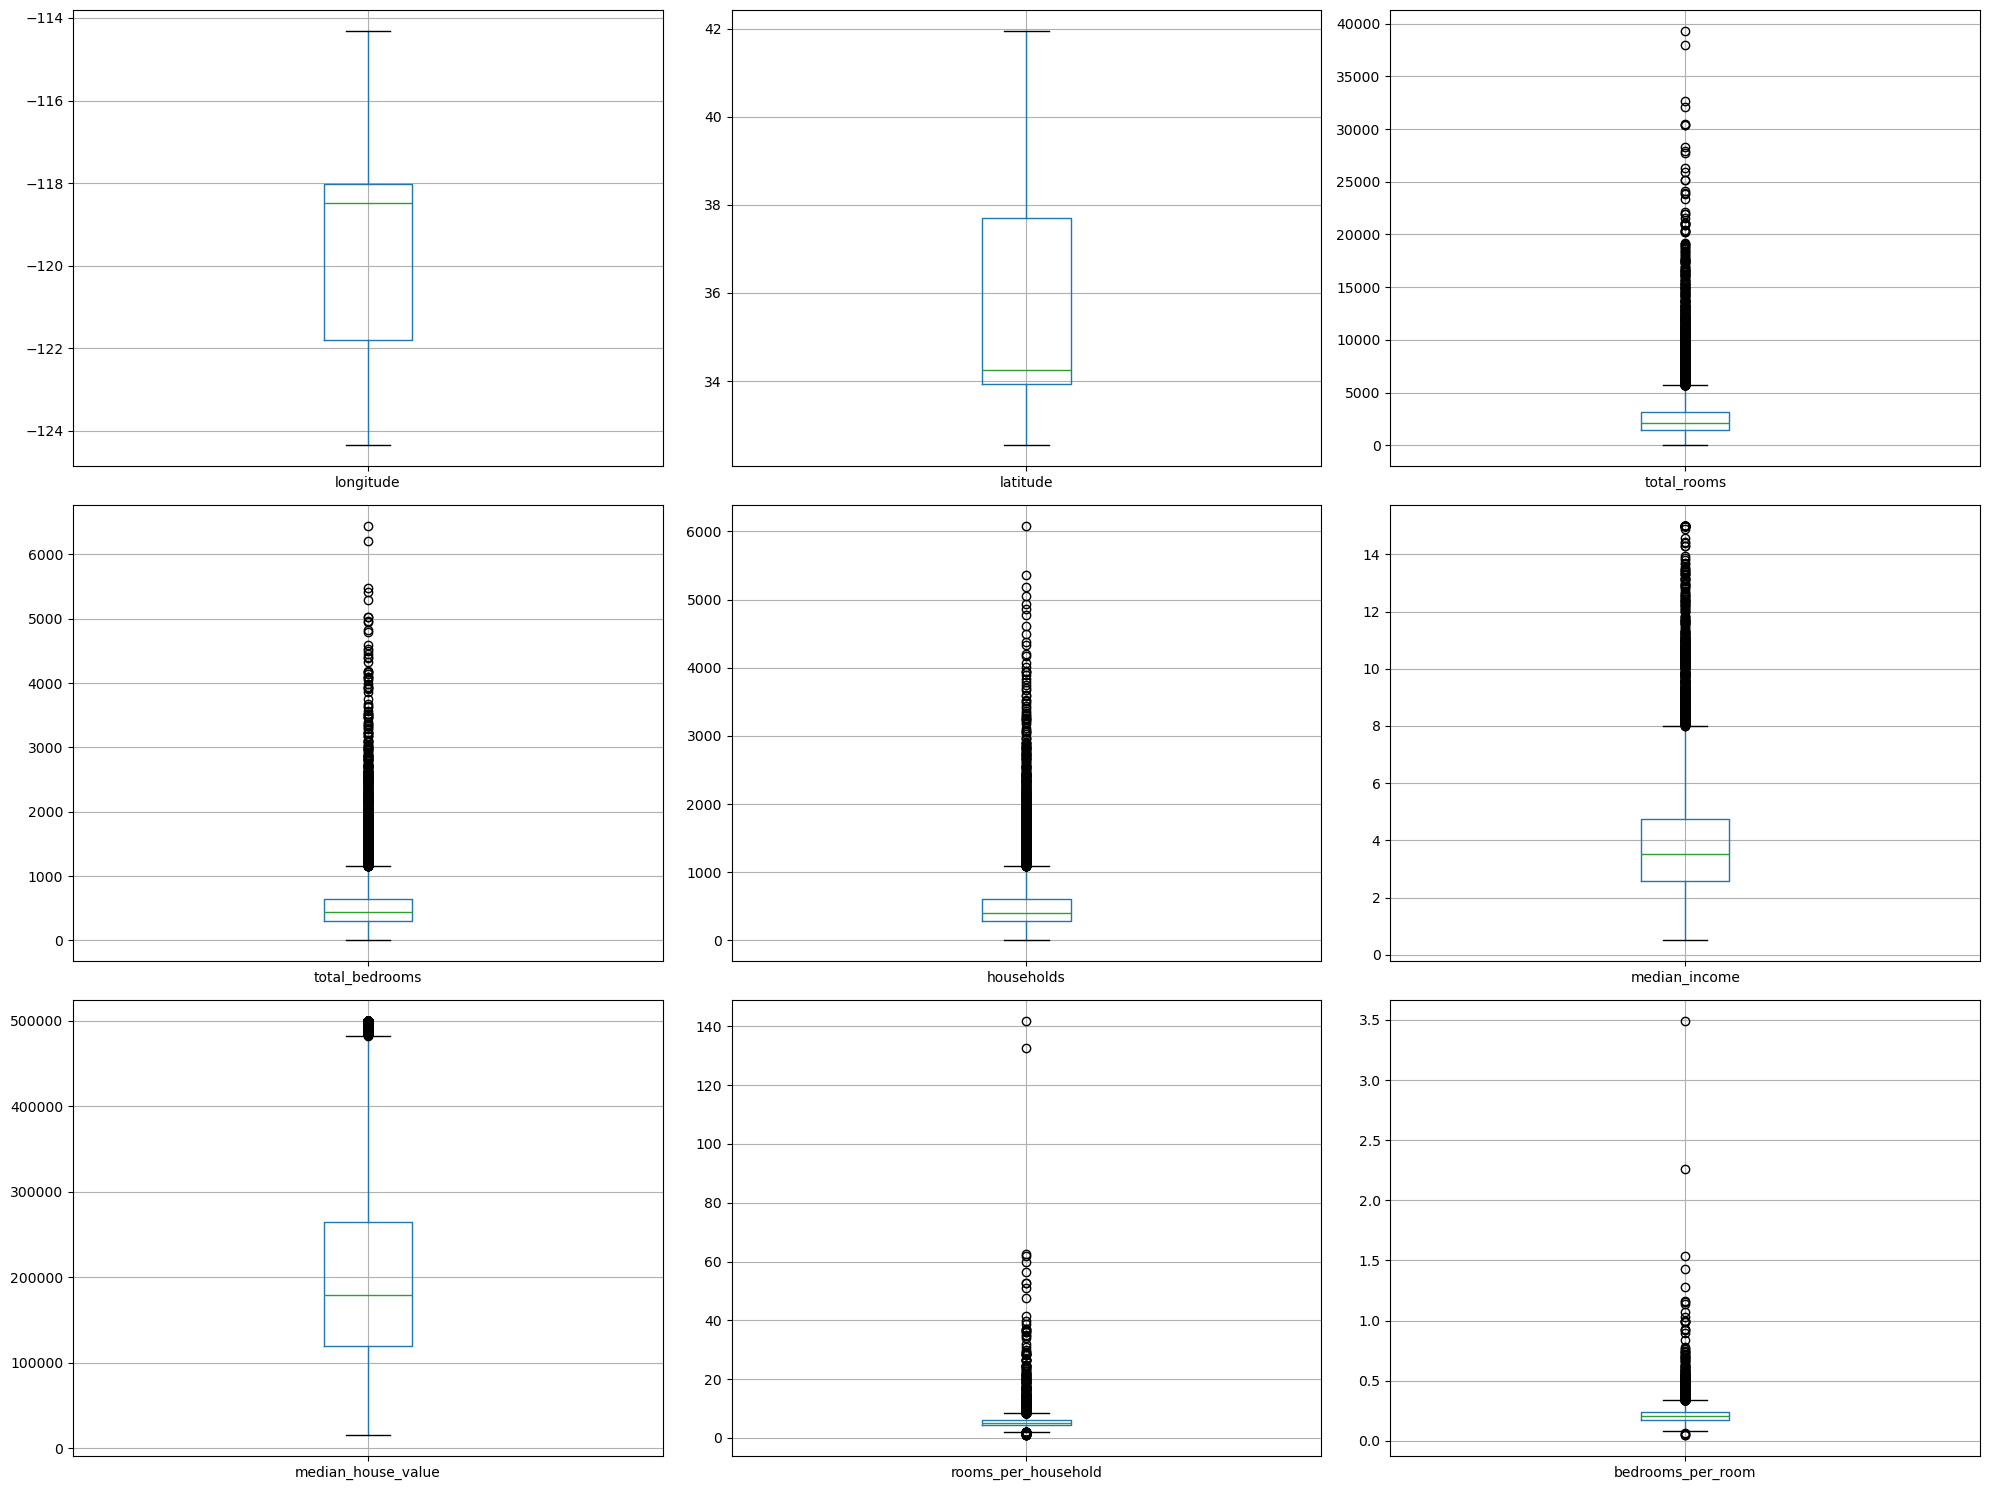

In [17]:
df_no_op = df.drop(['ocean_proximity'], axis=1)

# Create a figure and a grid of subplots
fig, axes = plt.subplots(len(df_no_op.columns)//3, 3, figsize=(20, 15))

# Flatten the array of axes
axes = axes.flatten()

# Loop over the columns of the dataframe and the flat array of axes
for ax, col in zip(axes, df_no_op.columns):
    # Create a boxplot for each column on a separate subplot
    df_no_op.boxplot(column=col, ax=ax)

# Remove any unused subplots
for i in range(len(df_no_op.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


### Histograms

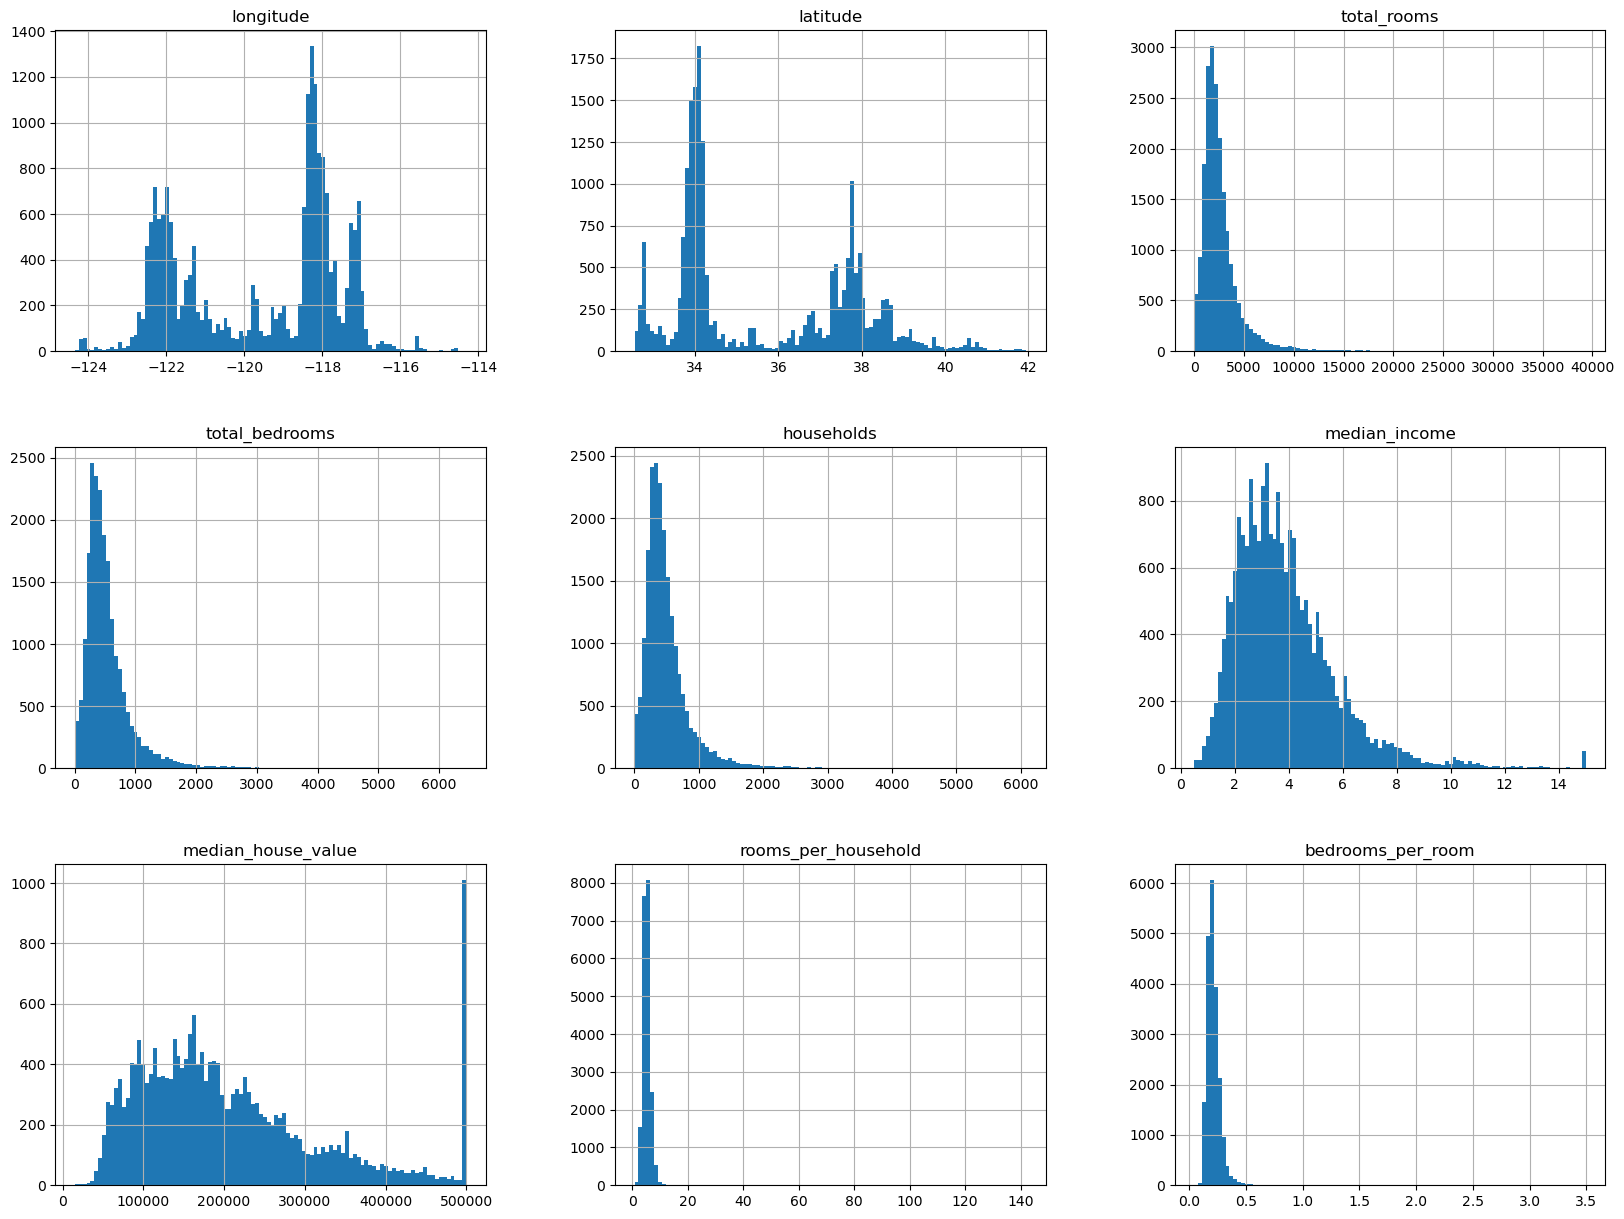

In [18]:
df.hist(bins=100, figsize=(20, 15));

In [19]:
df = df[df['median_house_value'] < 500000]

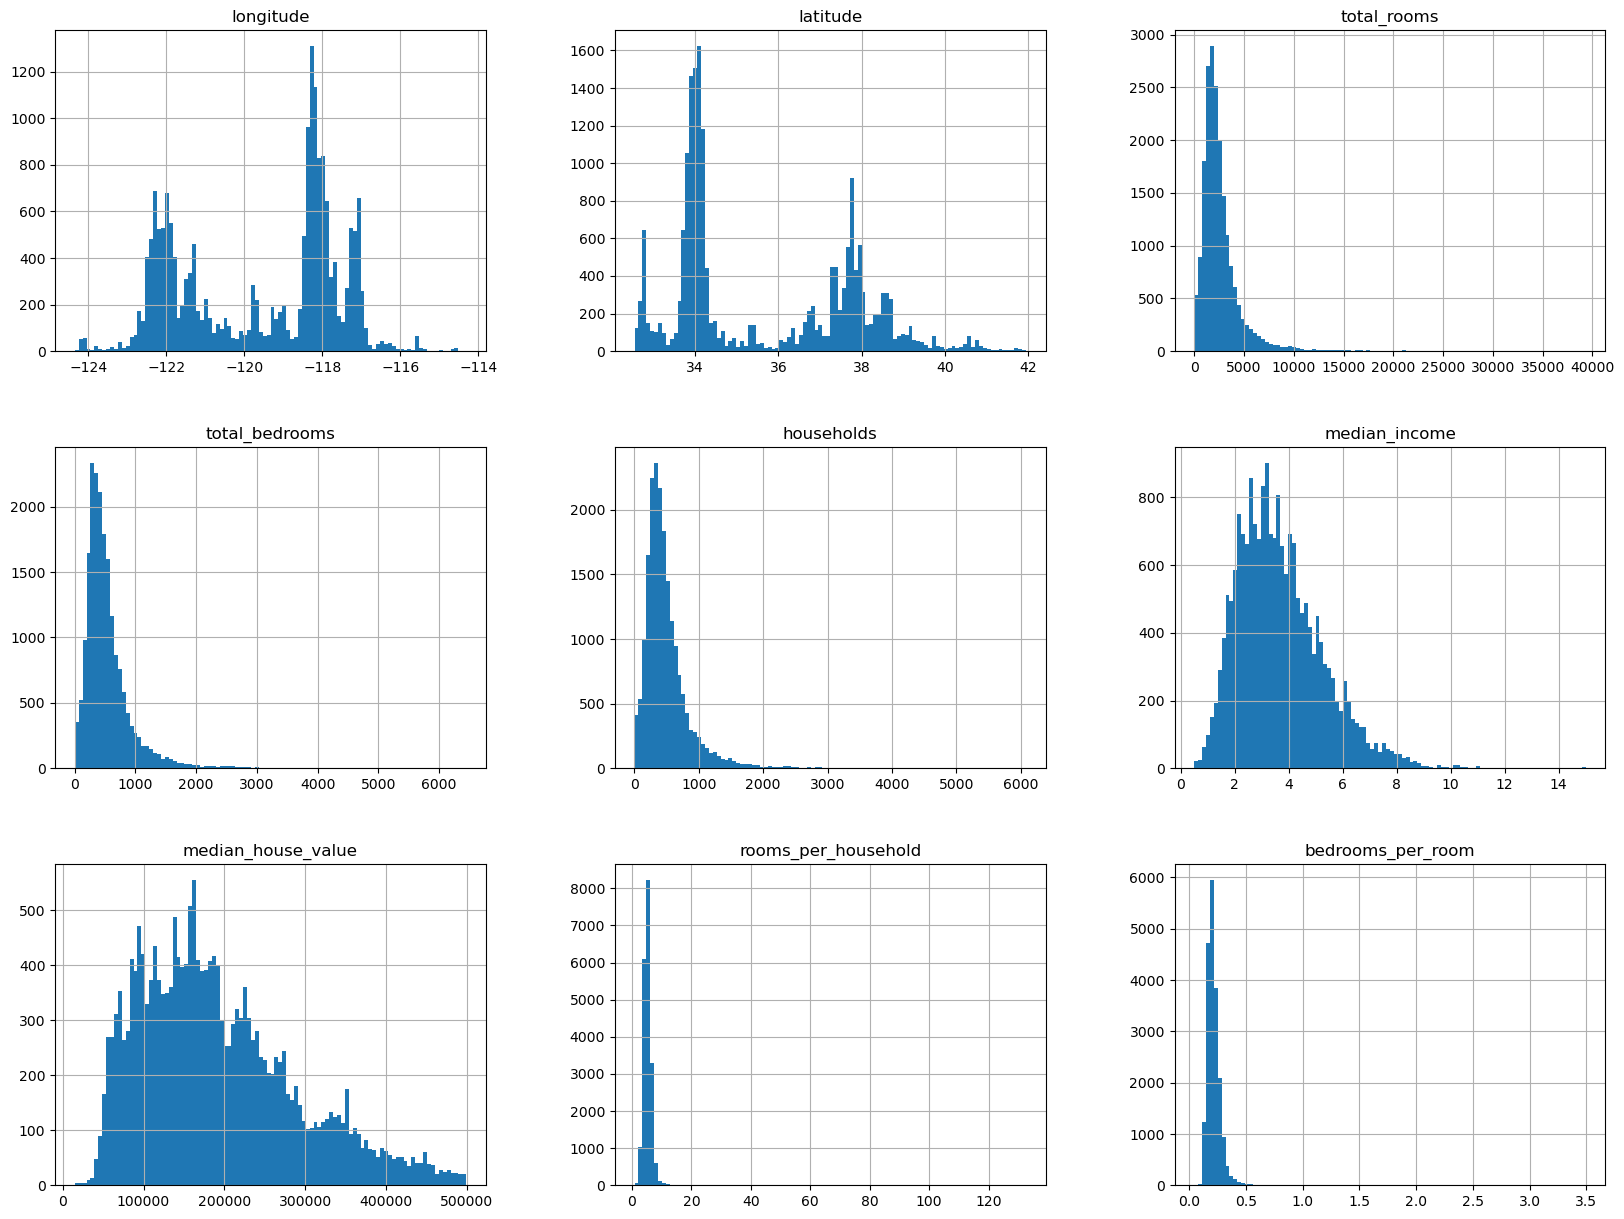

In [20]:
df.hist(bins=100, figsize=(20, 15));

In [ ]:
# # Find the maximum value in the 'housing_median_age' column
# max_value = df['housing_median_age'].max()

# # Count the occurrences of the maximum value
# count_max_value = df['housing_median_age'].value_counts()[max_value]

# print(f"The maximum value is {max_value} and it occurs {count_max_value} times.")

In [20]:
# df = df[df['housing_median_age'] < 52]

In [ ]:
# df.hist(bins=100, figsize=(20, 15));

In [129]:
# # Create a histogram for each column
# for column in df:
#     plt.figure()
#     sns.histplot(x=df[column], color='skyblue')
#     plt.title(column)
#     plt.show()

In [21]:
corr_matrix = df_no_op.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value     1.000000
median_income          0.688075
rooms_per_household    0.151948
total_rooms            0.134153
households             0.065843
total_bedrooms         0.049454
longitude             -0.045967
latitude              -0.144160
bedrooms_per_room     -0.220049
Name: median_house_value, dtype: float64

### Test for skew

In [22]:
for col in df.select_dtypes(include=[np.number]).columns:
    skewness = df[col].skew()
    if skewness > 0.5:
        print(f"{col},     Positive Skew:     {skewness}")
    elif skewness < -0.5:
        print(f"{col},     Negative Skew:     {skewness}")
    else:
        print(f"{col},     No Skew:     {skewness}")

longitude,     No Skew:     -0.29116183957536246
latitude,     No Skew:     0.4568711457336657
total_rooms,     Positive Skew:     4.226299671561802
total_bedrooms,     Positive Skew:     3.4765267983275034
households,     Positive Skew:     3.409187100907968
median_income,     Positive Skew:     0.9138199930855735
median_house_value,     Positive Skew:     0.7952314955635629
rooms_per_household,     Positive Skew:     16.608351403214527
bedrooms_per_room,     Positive Skew:     9.77973307401373


rooms_per_household certainly has the most skew

#### Applying transformations to rooms_per_household

0.895863253691802


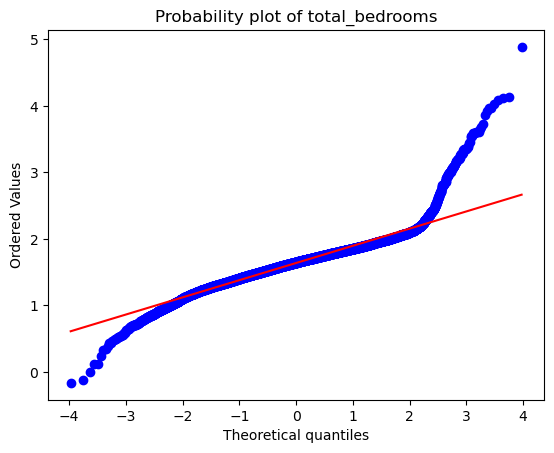

In [23]:
x = np.log(df['rooms_per_household'])
print(x.skew())

probplot(x, dist="norm", plot=plt)
plt.title('Probability plot of total_bedrooms')
plt.show()

4.5096105725794455


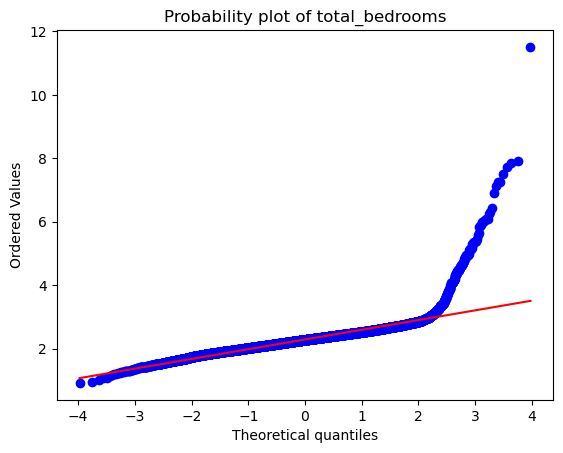

In [24]:
x = np.sqrt(df['rooms_per_household'])
print(x.skew())

probplot(x, dist="norm", plot=plt)
plt.title('Probability plot of total_bedrooms')
plt.show()

-0.3012343594769252


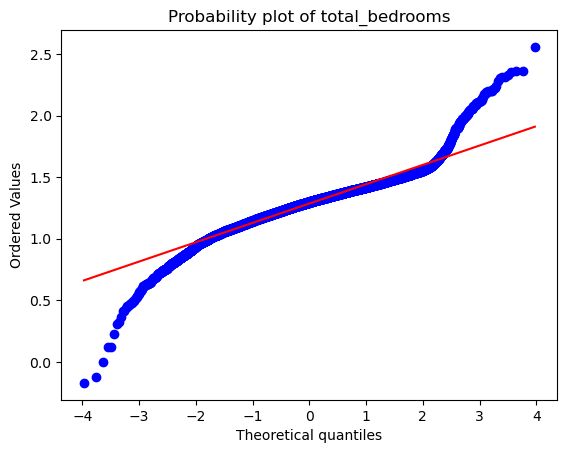

In [25]:
boxcox_x, lambda_ = boxcox(df['rooms_per_household'])
print(lambda_)

probplot(boxcox_x, dist="norm", plot=plt)
plt.title('Probability plot of total_bedrooms')
plt.show()

Transformation Results:
log:      0.8680607951109436
sqrt:     4.850183404126622
Box-cox: -0.2980048976549959

The box-cox provided the best results, however, the probability plot is still not ideal. 

### Removing anomalies

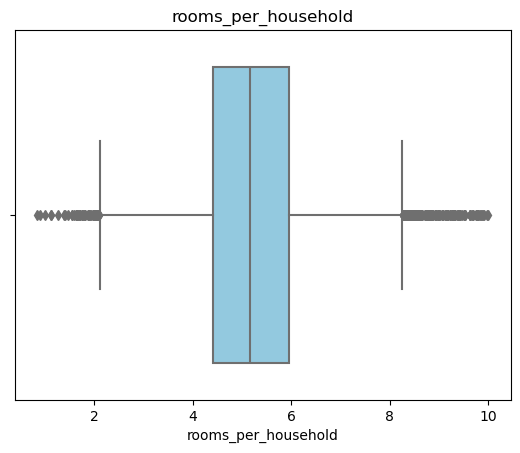

(19648, 10)


In [27]:
df_rooms_per_household_mod = df[df['rooms_per_household'] <= 10]

sns.boxplot(x=df_rooms_per_household_mod['rooms_per_household'], color='skyblue')
plt.title('rooms_per_household')
plt.show()

print(df.shape)

log: -0.6330655421363666


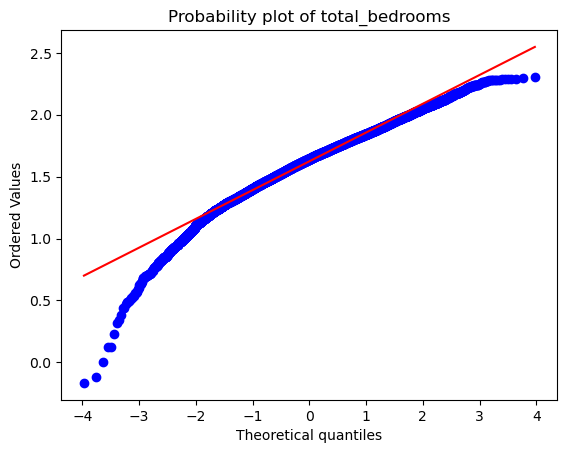

sqrt: -0.13255728608717487


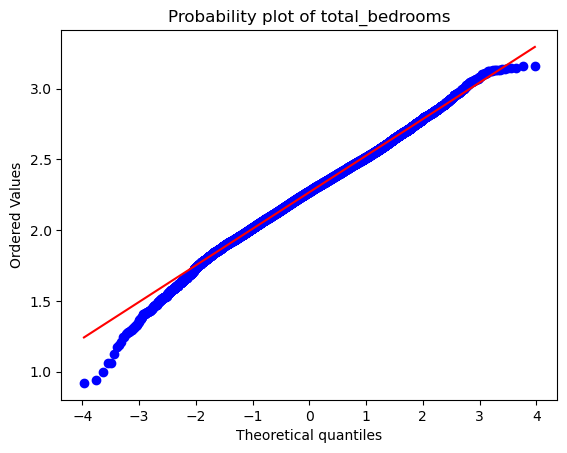

Box-cox: 0.6792727413661342


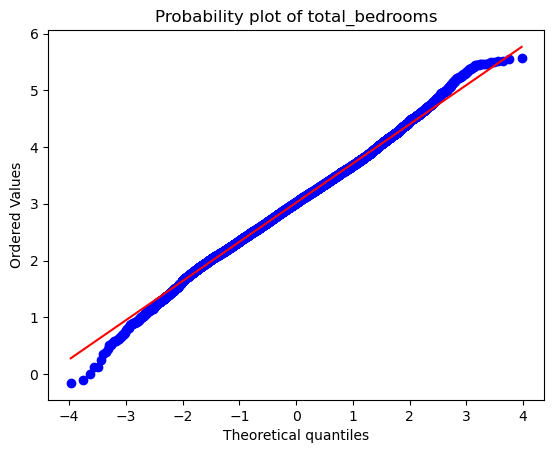

In [28]:
x = np.log(df_rooms_per_household_mod['rooms_per_household'])
print(f'log: {x.skew()}')
probplot(x, dist="norm", plot=plt)
plt.title('Probability plot of total_bedrooms')
plt.show()

x = np.sqrt(df_rooms_per_household_mod['rooms_per_household'])
print(f'sqrt: {x.skew()}')
probplot(x, dist="norm", plot=plt)
plt.title('Probability plot of total_bedrooms')
plt.show()

boxcox_x, lambda_ = boxcox(df_rooms_per_household_mod['rooms_per_household'])
print(f'Box-cox: {lambda_}')
probplot(boxcox_x, dist="norm", plot=plt)
plt.title('Probability plot of total_bedrooms')
plt.show()

After removing some data, applying a square-root transformation provides the lowest skew (-0.054122564845200706) and now matches the normal distribution better also. 

In [29]:
# remove anomalies
df = df[df['rooms_per_household'] <= 10]

# apply square-root
df.loc[:, 'rooms_per_household'] = np.sqrt(df['rooms_per_household'])

In [30]:
for col in df.select_dtypes(include=[np.number]).columns:
    skewness = df[col].skew()
    if skewness > 0.5:
        print(f"{col},     Positive Skew:     {skewness}")
    elif skewness < -0.5:
        print(f"{col},     Negative Skew:     {skewness}")
    else:
        print(f"{col},     No Skew:     {skewness}")

longitude,     No Skew:     -0.29567163953112763
latitude,     No Skew:     0.4616354936185676
total_rooms,     Positive Skew:     4.270343196791093
total_bedrooms,     Positive Skew:     3.490981133786965
households,     Positive Skew:     3.425581626994351
median_income,     Positive Skew:     0.8757871918005606
median_house_value,     Positive Skew:     0.7891694999712288
rooms_per_household,     No Skew:     -0.13255728608717487
bedrooms_per_room,     Positive Skew:     9.775616095388878


0.9036284413370393


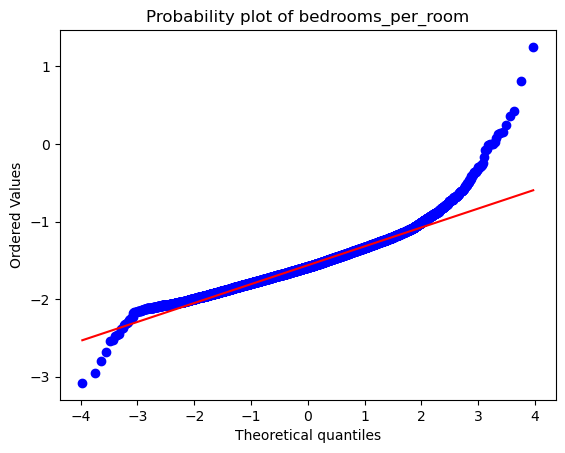

In [31]:
x = np.log(df['bedrooms_per_room'])
print(x.skew())

probplot(x, dist="norm", plot=plt)
plt.title('Probability plot of bedrooms_per_room')
plt.show()

2.579111786128389


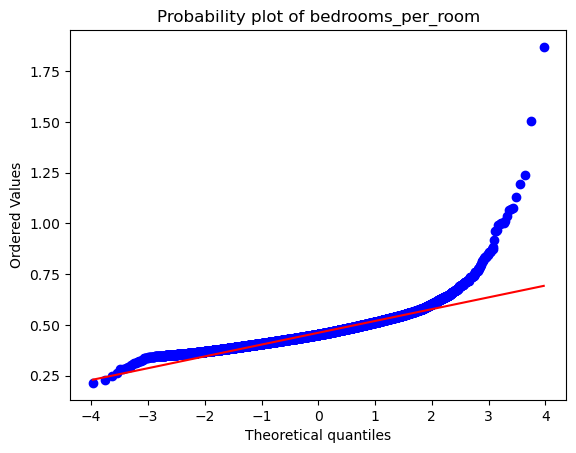

In [32]:
x = np.sqrt(df['bedrooms_per_room'])
print(x.skew())

probplot(x, dist="norm", plot=plt)
plt.title('Probability plot of bedrooms_per_room')
plt.show()

-0.6689827615322969


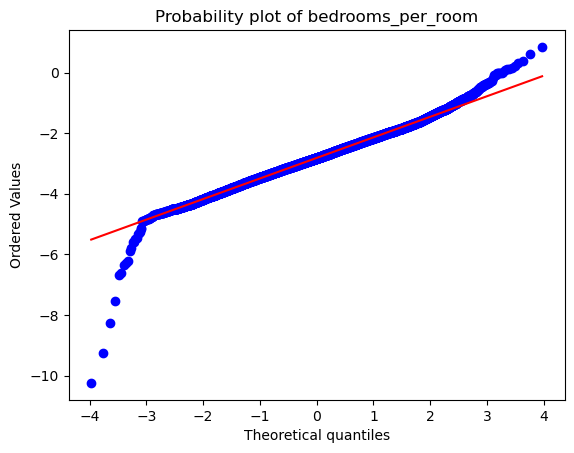

In [33]:
boxcox_x, lambda_ = boxcox(df['bedrooms_per_room'])
print(lambda_)

probplot(boxcox_x, dist="norm", plot=plt)
plt.title('Probability plot of bedrooms_per_room')
plt.show()

In [34]:
# remove anomalies
df = df[df['bedrooms_per_room'] <= 0.6]

0.4601640518895829


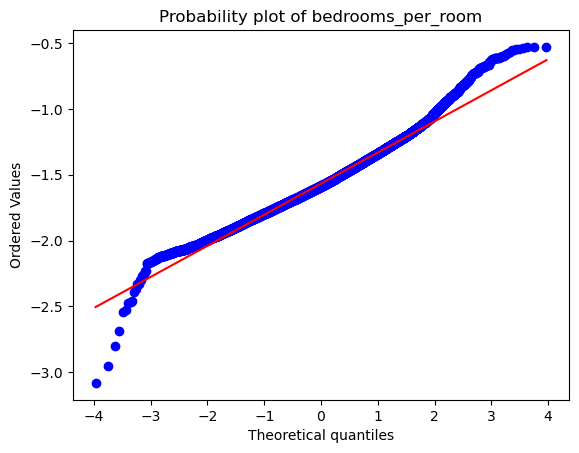

In [35]:
x = np.log(df['bedrooms_per_room'])
print(x.skew())

probplot(x, dist="norm", plot=plt)
plt.title('Probability plot of bedrooms_per_room')
plt.show()

0.9607078502340712


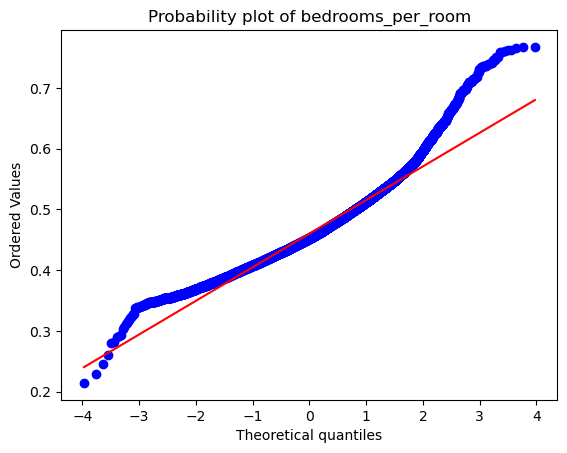

In [36]:
x = np.sqrt(df['bedrooms_per_room'])
print(x.skew())

probplot(x, dist="norm", plot=plt)
plt.title('Probability plot of bedrooms_per_room')
plt.show()

-0.5050947389536358


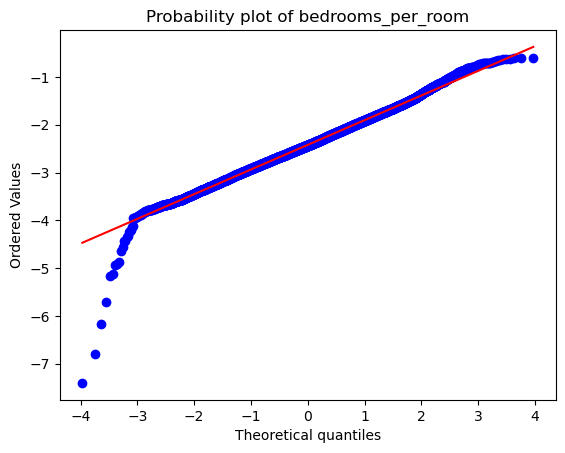

In [37]:
boxcox_x, lambda_ = boxcox(df['bedrooms_per_room'])
print(lambda_)

probplot(boxcox_x, dist="norm", plot=plt)
plt.title('Probability plot of bedrooms_per_room')
plt.show()

In [38]:
# apply square-root
df.loc[:, 'bedrooms_per_room'] = np.sqrt(df['bedrooms_per_room'])

### Check for anomalies (boxplots again)

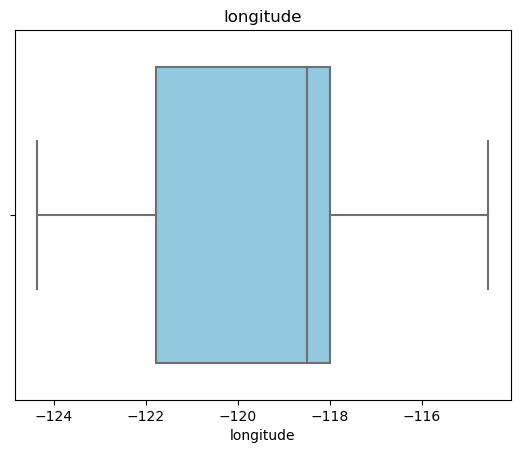

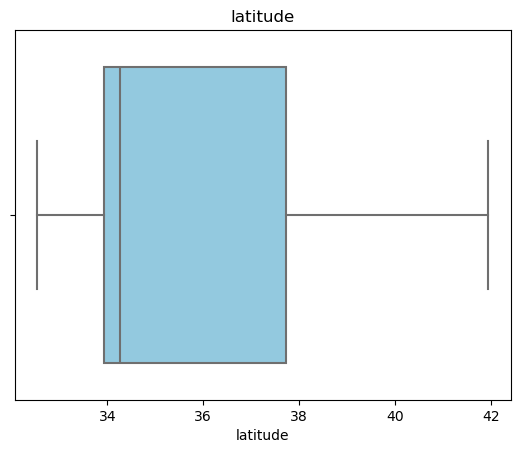

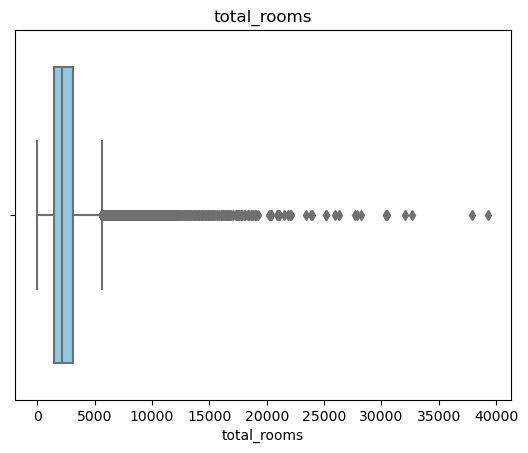

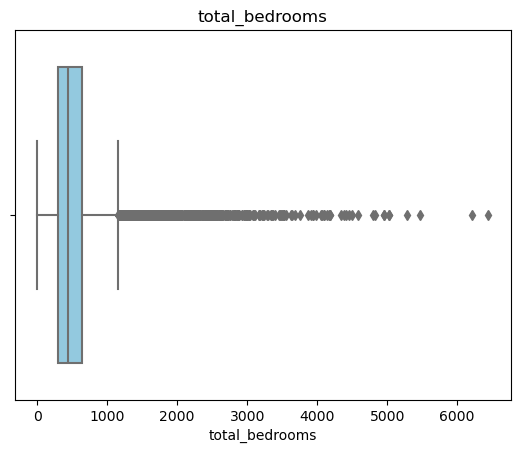

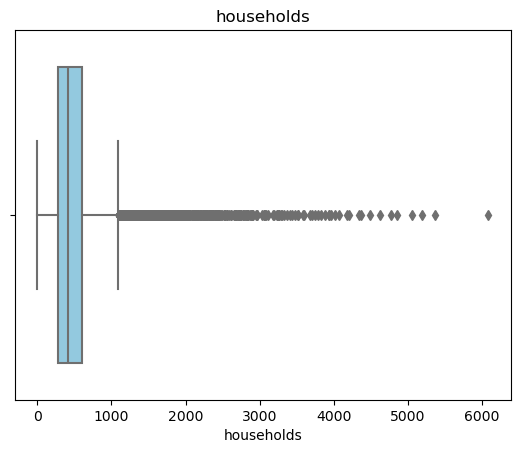

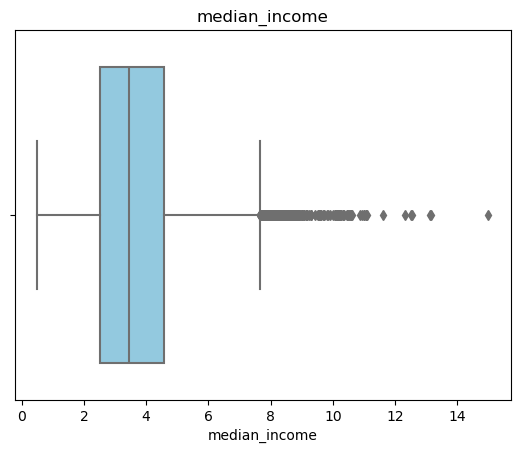

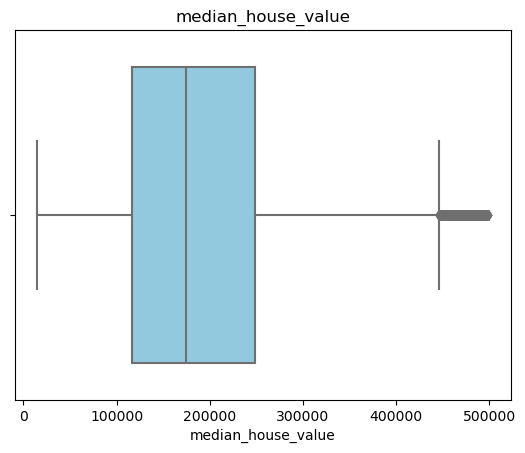

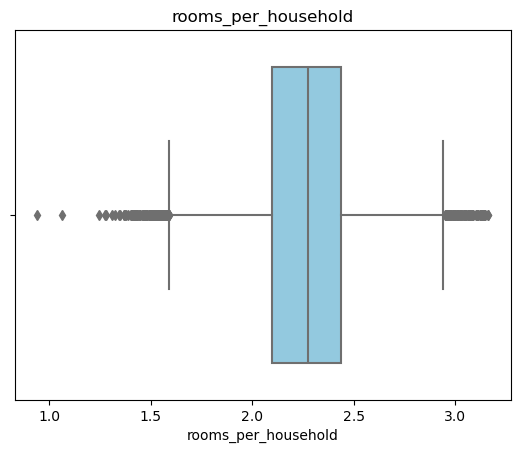

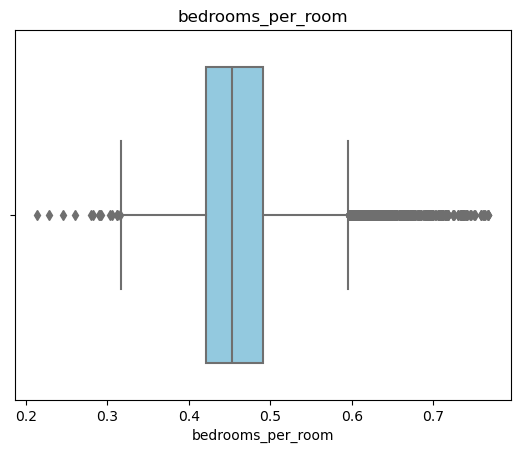

In [39]:
# Create a boxplot for each column
for column in df:
    # Check if the column data type is numeric
    if pd.api.types.is_numeric_dtype(df[column]):
        plt.figure()
        sns.boxplot(x=df[column], color='skyblue')
        plt.title(column)
        plt.show()

The features that may have anomalies are total_bedrooms, population, median_income, and rooms_per_household

### Remove anomalies

#### population

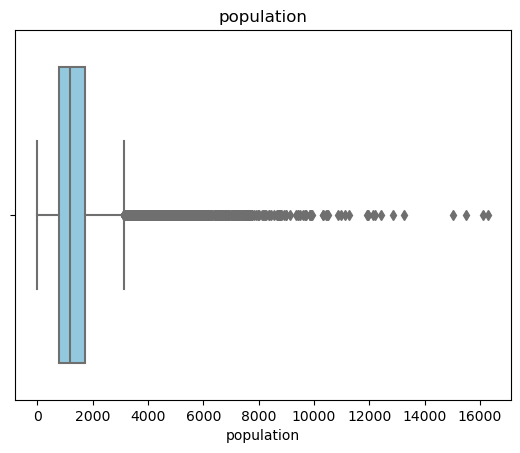

(20412, 9)


In [139]:
# df = df[df['population'] <= 20000]

# sns.boxplot(x=df['population'], color='skyblue')
# plt.title('population')
# plt.show()

# print(df.shape)

In [40]:
df

,longitude,latitude,total_rooms,total_bedrooms,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room
0,-122.23,37.88,880.0,129.0,126.0,8.3252,452600.0,NEAR BAY,2.642750,0.382872
1,-122.22,37.86,7099.0,1106.0,1138.0,8.3014,358500.0,NEAR BAY,2.497626,0.394711
2,-122.24,37.85,1467.0,190.0,177.0,7.2574,352100.0,NEAR BAY,2.878912,0.359883
3,-122.25,37.85,1274.0,235.0,219.0,5.6431,341300.0,NEAR BAY,2.411919,0.429486
4,-122.25,37.85,1627.0,280.0,259.0,3.8462,342200.0,NEAR BAY,2.506363,0.414844
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,1665.0,374.0,330.0,1.5603,78100.0,INLAND,2.246209,0.473946
20636,-121.21,39.49,697.0,150.0,114.0,2.5568,77100.0,INLAND,2.472657,0.463905
20637,-121.22,39.43,2254.0,485.0,433.0,1.7000,92300.0,INLAND,2.281566,0.463867
20638,-121.32,39.43,1860.0,409.0,349.0,1.8672,84700.0,INLAND,2.308574,0.468927


### Encode ocean_proximity

In [41]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [42]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     8559
INLAND        6313
NEAR OCEAN    2427
NEAR BAY      2084
ISLAND           5
Name: count, dtype: int64

In [45]:
one_hot_encoder = OneHotEncoder()

ocean_proximity_one_hot = one_hot_encoder.fit_transform(df[['ocean_proximity']])

In [46]:
ocean_proximity_one_hot

<19388x5 sparse matrix of type '<class 'numpy.float64'>'
	with 19388 stored elements in Compressed Sparse Row format>

In [47]:
ocean_proximity_one_hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [48]:
# Convert the numpy array to a DataFrame
categories_df = pd.DataFrame(ocean_proximity_one_hot.toarray(), columns=one_hot_encoder.categories_[0], index=df.index) # its important to ensure the indexes match!

# print(df.shape)
# print(categories_df.shape)
# print(df.isnull().sum())
# print(categories_df.isnull().sum())

# Concatenate the new DataFrame with the original DataFrame
df = pd.concat([df.drop('ocean_proximity', axis=1), categories_df], axis=1)


# housing_data2 = pd.concat(housing_data2, ocean_data, axis=1)

# print(df.isnull().sum())


In [49]:
categories_df

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
20635,0.0,1.0,0.0,0.0,0.0
20636,0.0,1.0,0.0,0.0,0.0
20637,0.0,1.0,0.0,0.0,0.0
20638,0.0,1.0,0.0,0.0,0.0


In [50]:
df

,longitude,latitude,total_rooms,total_bedrooms,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,880.0,129.0,126.0,8.3252,452600.0,2.642750,0.382872,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,7099.0,1106.0,1138.0,8.3014,358500.0,2.497626,0.394711,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,1467.0,190.0,177.0,7.2574,352100.0,2.878912,0.359883,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,1274.0,235.0,219.0,5.6431,341300.0,2.411919,0.429486,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,1627.0,280.0,259.0,3.8462,342200.0,2.506363,0.414844,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,1665.0,374.0,330.0,1.5603,78100.0,2.246209,0.473946,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,697.0,150.0,114.0,2.5568,77100.0,2.472657,0.463905,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,2254.0,485.0,433.0,1.7000,92300.0,2.281566,0.463867,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,1860.0,409.0,349.0,1.8672,84700.0,2.308574,0.468927,0.0,1.0,0.0,0.0,0.0


### Check for correlations

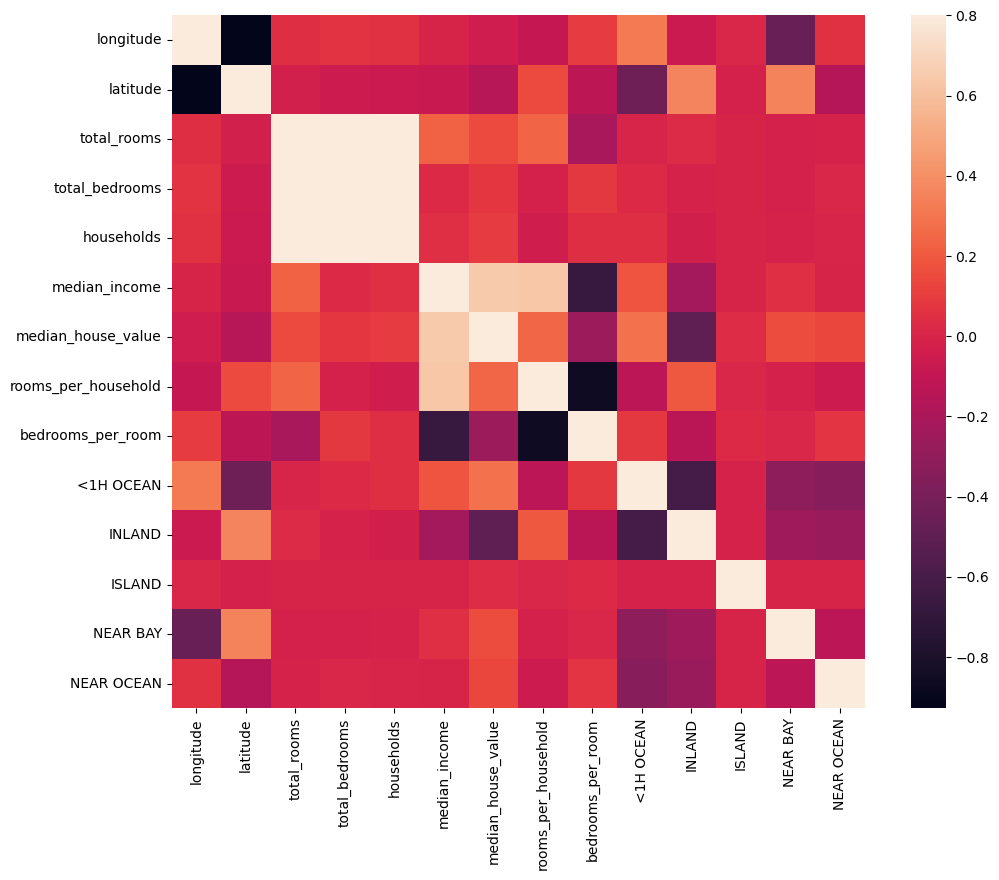

In [51]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Based on this correlation matrix, the longitude and latitude are highly correlated. We could consider removing one of these features as a multicollinearity is present. It would appear that latitude has a higher skew than the longitude, so we will drop the latitude feature.

In [52]:
df

,longitude,latitude,total_rooms,total_bedrooms,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,880.0,129.0,126.0,8.3252,452600.0,2.642750,0.382872,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,7099.0,1106.0,1138.0,8.3014,358500.0,2.497626,0.394711,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,1467.0,190.0,177.0,7.2574,352100.0,2.878912,0.359883,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,1274.0,235.0,219.0,5.6431,341300.0,2.411919,0.429486,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,1627.0,280.0,259.0,3.8462,342200.0,2.506363,0.414844,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,1665.0,374.0,330.0,1.5603,78100.0,2.246209,0.473946,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,697.0,150.0,114.0,2.5568,77100.0,2.472657,0.463905,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,2254.0,485.0,433.0,1.7000,92300.0,2.281566,0.463867,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,1860.0,409.0,349.0,1.8672,84700.0,2.308574,0.468927,0.0,1.0,0.0,0.0,0.0


In [53]:
df = df.drop(['latitude'], axis=1)
df

,longitude,total_rooms,total_bedrooms,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,880.0,129.0,126.0,8.3252,452600.0,2.642750,0.382872,0.0,0.0,0.0,1.0,0.0
1,-122.22,7099.0,1106.0,1138.0,8.3014,358500.0,2.497626,0.394711,0.0,0.0,0.0,1.0,0.0
2,-122.24,1467.0,190.0,177.0,7.2574,352100.0,2.878912,0.359883,0.0,0.0,0.0,1.0,0.0
3,-122.25,1274.0,235.0,219.0,5.6431,341300.0,2.411919,0.429486,0.0,0.0,0.0,1.0,0.0
4,-122.25,1627.0,280.0,259.0,3.8462,342200.0,2.506363,0.414844,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,1665.0,374.0,330.0,1.5603,78100.0,2.246209,0.473946,0.0,1.0,0.0,0.0,0.0
20636,-121.21,697.0,150.0,114.0,2.5568,77100.0,2.472657,0.463905,0.0,1.0,0.0,0.0,0.0
20637,-121.22,2254.0,485.0,433.0,1.7000,92300.0,2.281566,0.463867,0.0,1.0,0.0,0.0,0.0
20638,-121.32,1860.0,409.0,349.0,1.8672,84700.0,2.308574,0.468927,0.0,1.0,0.0,0.0,0.0


In [54]:
df.isnull().any()

longitude              False
total_rooms            False
total_bedrooms         False
households             False
median_income          False
median_house_value     False
rooms_per_household    False
bedrooms_per_room      False
<1H OCEAN              False
INLAND                 False
ISLAND                 False
NEAR BAY               False
NEAR OCEAN             False
dtype: bool

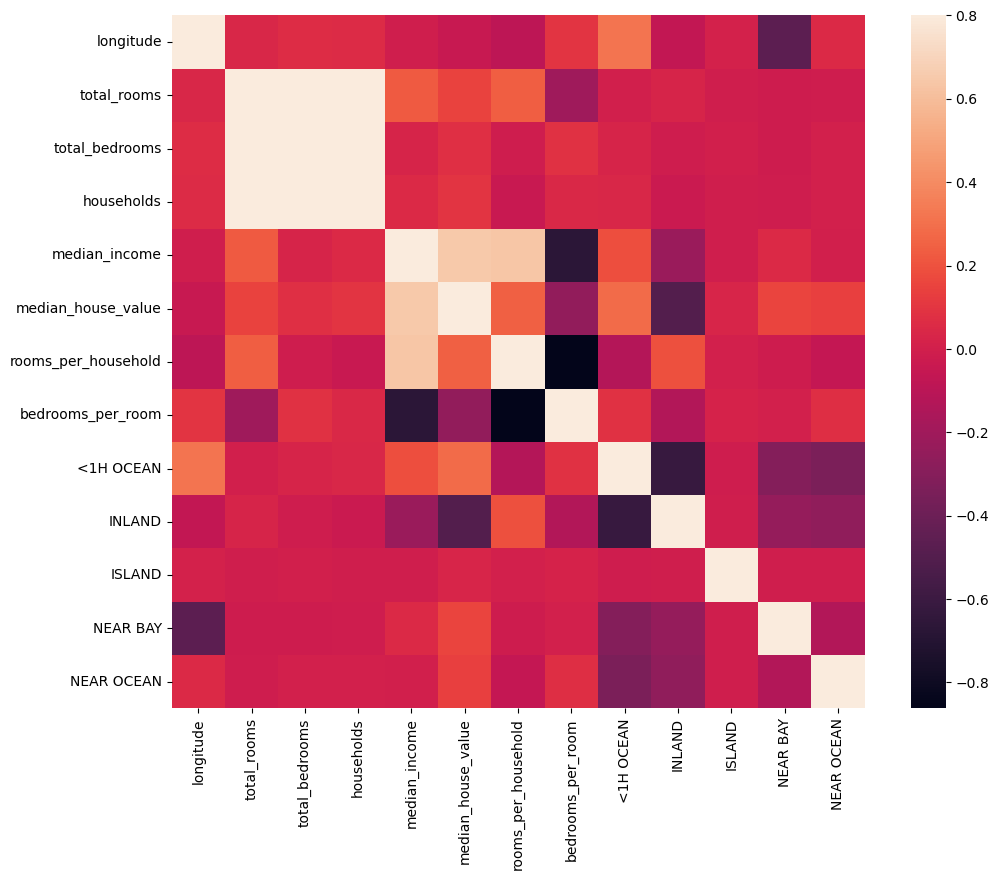

In [55]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Could remove more features...

In [64]:
from sklearn.model_selection import train_test_split

# Define features and target
y = df['median_house_value']
X = df.drop('median_house_value', axis=1)
X = X.drop('ISLAND', axis=1)   # only need n-1 features for this categorical variable

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature scaling

In [65]:
from sklearn.preprocessing import StandardScaler

print(X_train.iloc[0])

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(X_train[0])

longitude              -118.040000
total_rooms            2302.000000
total_bedrooms          412.000000
households              406.000000
median_income             4.801700
rooms_per_household       2.381166
bedrooms_per_room         0.423054
<1H OCEAN                 0.000000
INLAND                    1.000000
NEAR BAY                  0.000000
NEAR OCEAN                0.000000
Name: 6459, dtype: float64
[ 0.76646546 -0.13921779 -0.29592238 -0.2512825   0.71793147  0.43606168
 -0.65447942 -0.89100681  1.4461981  -0.35189715 -0.37531402]


### Train model

In [66]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept=True)
model = reg.fit(X_train, y_train)

prediction = model.predict(X_test)

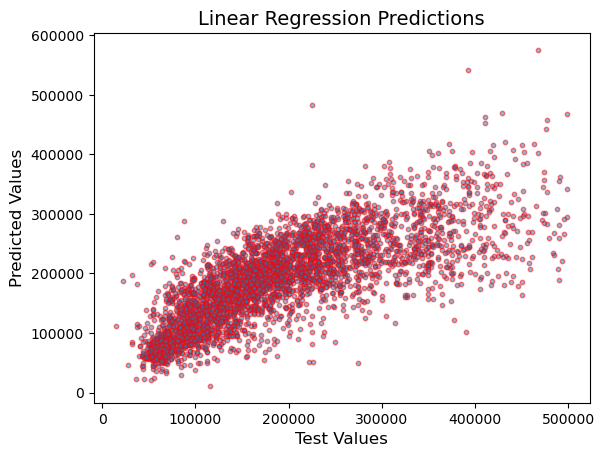

R^2 Score: 0.5823873778116254
Mean Absolute Error: 46449.456622320424
Mean Squared Error: 4001578359.643125
Root Mean Squared Error: 63258.03000128225
Mean Absolute Percentage Error: 27.674019913660285%


In [67]:
fig, ax = plt.subplots()

ax.scatter(y_test, prediction, alpha=0.5, edgecolors='r', s=10)
ax.set_title('Linear Regression Predictions', fontsize=14)
ax.set_xlabel('Test Values', fontsize=12)
ax.set_ylabel('Predicted Values', fontsize=12)
plt.show()

r2 = r2_score(y_test, prediction)
print(f'R^2 Score: {r2}')
mae = mean_absolute_error(y_test, prediction)
print(f'Mean Absolute Error: {mae}')
mse = mean_squared_error(y_test, prediction)
print(f'Mean Squared Error: {mse}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')
mape = np.mean(np.abs((y_test - prediction) / y_test)) * 100
print(f'Mean Absolute Percentage Error: {mape}%')

In [68]:
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)

# Train the model using the training sets
dt.fit(X_train, y_train)

# Make predictions using the testing set
prediction = dt.predict(X_test)

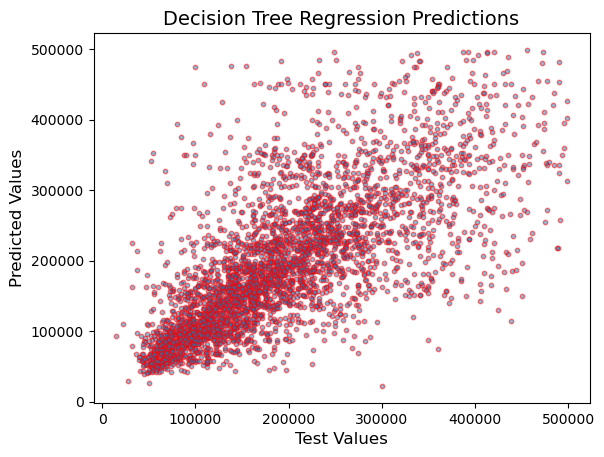

R^2 Score: 0.4385523865774157
Mean Absolute Error: 50040.974987106754
Mean Squared Error: 5379810141.207066
Root Mean Squared Error: 73347.18904775468
Mean Absolute Percentage Error: 28.748874483321373%


In [69]:
fig, ax = plt.subplots()
ax.scatter(y_test, prediction, alpha=0.5, edgecolors='r', s=10)
ax.set_title('Decision Tree Regression Predictions', fontsize=14)
ax.set_xlabel('Test Values', fontsize=12)
ax.set_ylabel('Predicted Values', fontsize=12)
plt.show()

r2 = r2_score(y_test, prediction)
print(f'R^2 Score: {r2}')
mae = mean_absolute_error(y_test, prediction)
print(f'Mean Absolute Error: {mae}')
mse = mean_squared_error(y_test, prediction)
print(f'Mean Squared Error: {mse}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')
mape = np.mean(np.abs((y_test - prediction) / y_test)) * 100
print(f'Mean Absolute Percentage Error: {mape}%')

In [70]:
from sklearn.ensemble import RandomForestRegressor
# Create a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=500, random_state=42)

# Train the model using the training sets
rf.fit(X_train, y_train)

# Make predictions using the testing set
prediction = rf.predict(X_test)

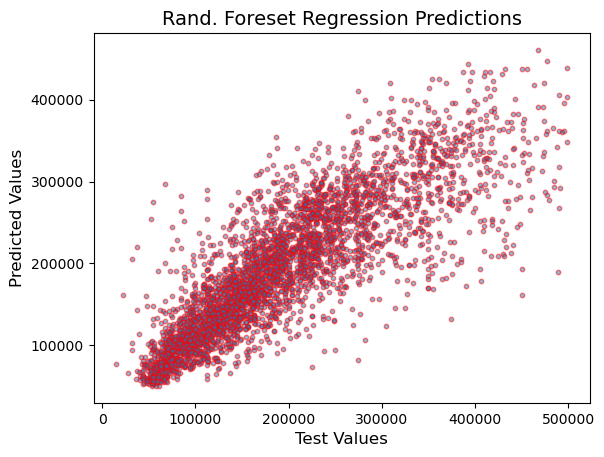

R^2 Score: 0.7109466551703327
Mean Absolute Error: 36654.62429602888
Mean Squared Error: 2769718988.357382
Root Mean Squared Error: 52628.119749401856
Mean Absolute Percentage Error: 21.595755013223737%


In [71]:
fig, ax = plt.subplots()
ax.scatter(y_test, prediction, alpha=0.5, edgecolors='r', s=10)
ax.set_title('Rand. Foreset Regression Predictions', fontsize=14)
ax.set_xlabel('Test Values', fontsize=12)
ax.set_ylabel('Predicted Values', fontsize=12)
plt.show()

r2 = r2_score(y_test, prediction)
print(f'R^2 Score: {r2}')
mae = mean_absolute_error(y_test, prediction)
print(f'Mean Absolute Error: {mae}')
mse = mean_squared_error(y_test, prediction)
print(f'Mean Squared Error: {mse}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')
mape = np.mean(np.abs((y_test - prediction) / y_test)) * 100
print(f'Mean Absolute Percentage Error: {mape}%')

# R^2 Score: 0.779030066240707
# Mean Absolute Error: 36770.76824638746
# Mean Squared Error: 3031770206.138931
# Root Mean Squared Error: 55061.512929985234
# Mean Absolute Percentage Error: 20.43322235238895%

# removed values equal to 500,000 house value
# R^2 Score: 0.7346097034744508
# Mean Absolute Error: 33915.126562901976
# Mean Squared Error: 2459027466.140827
# Root Mean Squared Error: 49588.5820138147
# Mean Absolute Percentage Error: 19.478135922663732%

# with 500 estimators:
# R^2 Score: 0.7349318861418735
# Mean Absolute Error: 33849.51390583998
# Mean Squared Error: 2456042217.476202
# Root Mean Squared Error: 49558.47271129531
# Mean Absolute Percentage Error: 19.399200314330763%

exploratory data analysis
clean data (remove null values)
encode (one-hot array)
*
**
***
****
split dataset into test and train
scale data (using train data only as reference)
create and train model (Decision Tree Regressor, SVM Regressor, Random Forest Regressor)
assess model accuracy


* remove anomalies
** feature creation
*** feature removal
**** check and correct for skew

In [76]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf,
                         X_train,
                         y_train,
                         scoring='neg_mean_squared_error',
                         cv=5)

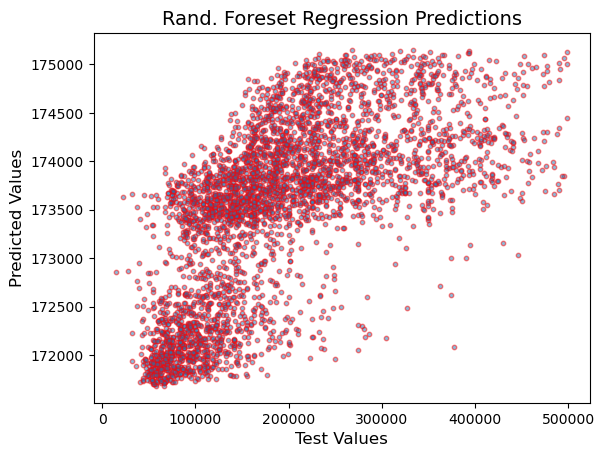

R^2 Score: -0.02565554117219926
Mean Absolute Error: 77170.43891132947
Mean Squared Error: 9827866304.652569
Root Mean Squared Error: 99135.59554797948
Mean Absolute Percentage Error: 50.96015782910908%


In [77]:
fig, ax = plt.subplots()
ax.scatter(y_test, prediction, alpha=0.5, edgecolors='r', s=10)
ax.set_title('Rand. Foreset Regression Predictions', fontsize=14)
ax.set_xlabel('Test Values', fontsize=12)
ax.set_ylabel('Predicted Values', fontsize=12)
plt.show()

r2 = r2_score(y_test, prediction)
print(f'R^2 Score: {r2}')
mae = mean_absolute_error(y_test, prediction)
print(f'Mean Absolute Error: {mae}')
mse = mean_squared_error(y_test, prediction)
print(f'Mean Squared Error: {mse}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')
mape = np.mean(np.abs((y_test - prediction) / y_test)) * 100
print(f'Mean Absolute Percentage Error: {mape}%')

In [78]:
from sklearn.model_selection import GridSearchCV

parameter_grid = [
    {'n_estimators': [10, 100],
     'max_features': [2, 8 ,13],
     'max_depth': [2, 10, None],
     }
]

grid_search = GridSearchCV(rf,
                           parameter_grid,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(n_estimators=500, random_state=42),
             param_grid=[{'max_depth': [2, 10, None],
                          'max_features': [2, 8, 13],
                          'n_estimators': [10, 100]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [72]:
from sklearn.svm import SVR

svr = SVR(kernel="rbf")
svr.fit(X_train, y_train)

prediction = svr.predict(X_test)

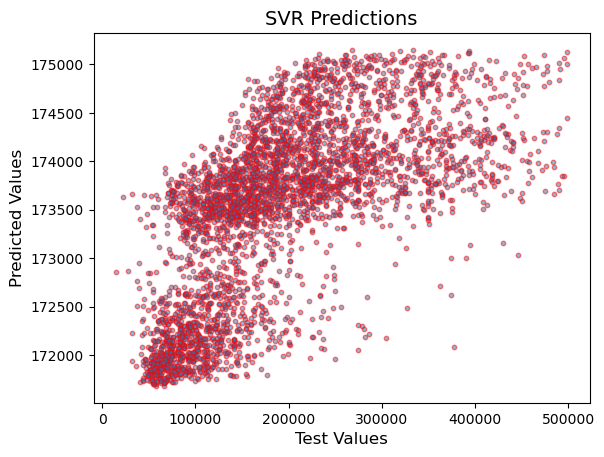

R^2 Score: -0.02565554117219926
Mean Absolute Error: 77170.43891132947
Mean Squared Error: 9827866304.652569
Root Mean Squared Error: 99135.59554797948
Mean Absolute Percentage Error: 50.96015782910908%


In [73]:
fig, ax = plt.subplots()
ax.scatter(y_test, prediction, alpha=0.5, edgecolors='r', s=10)
ax.set_title('SVR Predictions', fontsize=14)
ax.set_xlabel('Test Values', fontsize=12)
ax.set_ylabel('Predicted Values', fontsize=12)
plt.show()

r2 = r2_score(y_test, prediction)
print(f'R^2 Score: {r2}')
mae = mean_absolute_error(y_test, prediction)
print(f'Mean Absolute Error: {mae}')
mse = mean_squared_error(y_test, prediction)
print(f'Mean Squared Error: {mse}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')
mape = np.mean(np.abs((y_test - prediction) / y_test)) * 100
print(f'Mean Absolute Percentage Error: {mape}%')

In [165]:
# # Set the display format to non-scientific notation
# pd.set_option('display.float_format', lambda x: '%.2f' % x)